In [1]:
import numpy as np
import pandas as pd

- lista das palavras mais relevantes

In [2]:
c_power = ["power", "energy", "electric", "electrician", "electricity", "powerlines", "electric", "radiation",
          "reactor"]
c_shake = ["shake", "earthquake", "quake", "tremble", "rubble", "earthquakes", "earthqwakes", "earthqwake", 
           "vibrate"]
c_hospital = ["hospital", "hospitals", "die", "dead", "death", "health"]
c_disaster = ["disaster", "disasters"]
c_sewer = ["sewer", "sewage"]
c_evacuation = ["evacuation", "evacuate"]
others = ["nuclear", "repair", "structutral", "rescue", "emergency", "dangerous", "problem", "problems", "cry",
          "apocalypse", "sad", "ambulance", "victims", "help", "tragedy", "destroy", "roads", "scar", "hazard",
          "bridge", "damage", "build", "crew", "shudder", "incident", "wobble", "risk"]

p_usar = c_power + c_shake + c_hospital + c_disaster + c_sewer + c_evacuation + others
len(p_usar)

57

In [8]:
data = pd.read_csv("./data/data_procesada.csv", index_col=0, parse_dates=True, infer_datetime_format=True)
data.head()

,location,account,message
time,,,
2020-04-06 00:00:00,Weston,Opportunities2,"['take', 'advantheeseage', 'theesehese', 'one'..."
2020-04-06 00:00:00,Southton,LazyBCouch,"['watchesthomasbird', 'fork', 'back', 'someneo..."
2020-04-06 00:02:00,Southton,______3333_____,"['two', 'month', 'leave', 'bedoreefore', 'loos..."
2020-04-06 00:04:00,Broadview,RasoHorse49,"['billeeeeer', 'miss', 'ytouou']"
2020-04-06 00:07:00,West Parton,CuriousPlateBobbie_Mallon,"['obviously', 'need', 'use', 'rumble', 'rumble..."


In [16]:
names = ["Palace Hills", "Northwest", "Old Town", "Safe Town", "Southwest", "Downtown",
         "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Terrapin Springs",
         "Pepper Mill", "Cheddarford", "Easton", "Weston", "Southton", "Oak Willow",
         "East Parton", "West Parton"]

In [53]:
list_palavras = ""
intervalo = ["2020-04-06 19:40:00","2020-04-07 20:40:00"]
df_wcbairro = pd.DataFrame(columns=["intervalo", "location", "words"])
il = 0
h = 5
for ivalo in intervalo:
    for vec in names:
        list_palavras = ""
        for idx, cor in data.loc[data.location==vec]["2020-04-06 15:40:00":ivalo].iterrows():
            for word in p_usar:
                if word in cor.message:
                    if word in c_power:
                        list_palavras = list_palavras + " " + "power"
                    elif word in c_shake:
                        list_palavras = list_palavras + " " + "earthquake"
                    elif word in c_hospital:
                        list_palavras = list_palavras + " " + "hospital"
                    elif word in c_disaster:
                        list_palavras = list_palavras + " " + "disaster"
                    elif word in c_hospital:
                        list_palavras = list_palavras + " " + "hospital"
                    elif word in c_sewer:
                        list_palavras = list_palavras + " " + "sewer"
                    else:
                        list_palavras = list_palavras + " " + word
        df_wcbairro.loc[il] = [h, vec, list_palavras]
        il += 1
    h = 30

In [59]:
df_wcbairro.head()

,intervalo,location,words
0,5,Palace Hills,earthquake hospital hospital hospital hospita...
1,5,Northwest,power help hospital damage hospital hospital ...
2,5,Old Town,earthquake power repair problem hospital powe...
3,5,Safe Town,help earthquake hospital hospital hospital po...
4,5,Southwest,earthquake sad power help crew earthquake pow...


In [57]:
def gerar_wc(df, ivalo, idximg, bairro=""):
    """
    gera um wordcloud
    df: DataFrame
    bairro: bairro que vai ser selecionado para fazer o wordcloud
    ivalo: intervalo do tempo, si é 5 ou 30
    """
    import pandas as pd
    import numpy as np
    from PIL import Image
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    
    wine_mask = np.array(Image.open("grafico1/static/images/map_white.png"))
    if bairro=="":
        list_palavras = df.loc[df.intervalo==ivalo].words.values[0]
        wordcloud = WordCloud(max_font_size=300, max_words=50, mode='RGB',mask=wine_mask, colormap=plt.cm.Set1,
                          collocations=False, contour_width=8, relative_scaling=.5,
                          background_color="white").generate(list_palavras)
        # Display the generated image:
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
        plt.savefig("grafico1/static/images/geral" + idximg + ".png")
    else:
        list_palavras = df.loc[df.intervalo==ivalo].loc[df.loc[df.intervalo==ivalo].location==bairro].words.values[0]
        wordcloud = WordCloud(max_font_size=300, max_words=50, mode='RGB',mask=wine_mask, colormap=plt.cm.Set1,
                          collocations=False, contour_width=8, relative_scaling=.5,
                          background_color="white").generate(list_palavras)
        # Display the generated image:
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
        plt.savefig("grafico1/static/images/bairro" + idximg + ".png")

ValueError: We need at least 1 word to plot a word cloud, got 0.

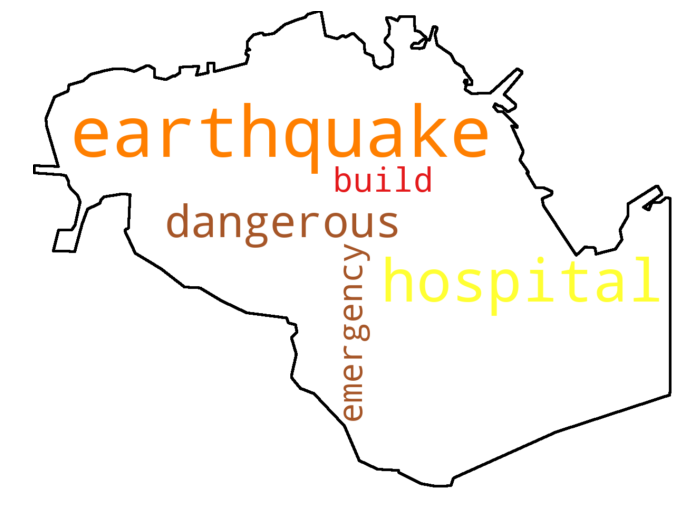

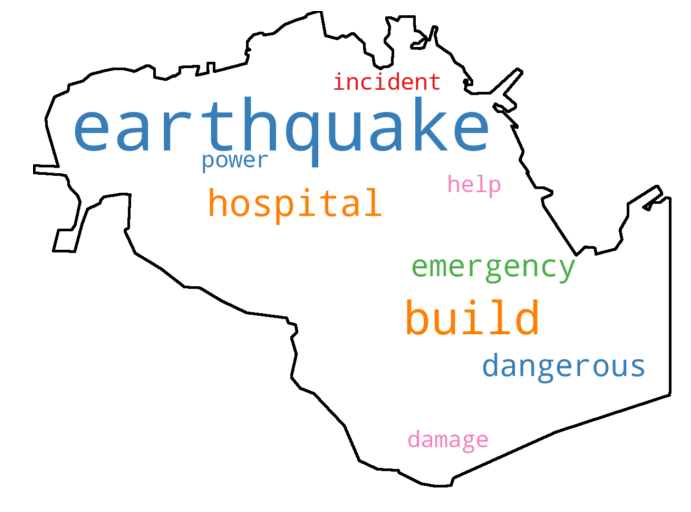

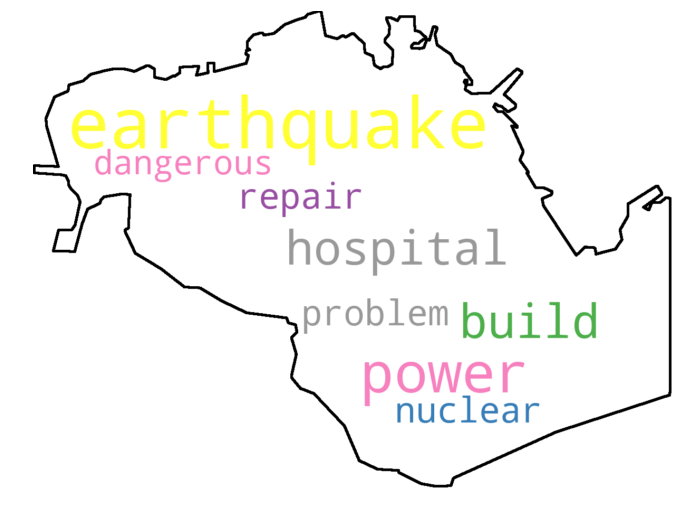

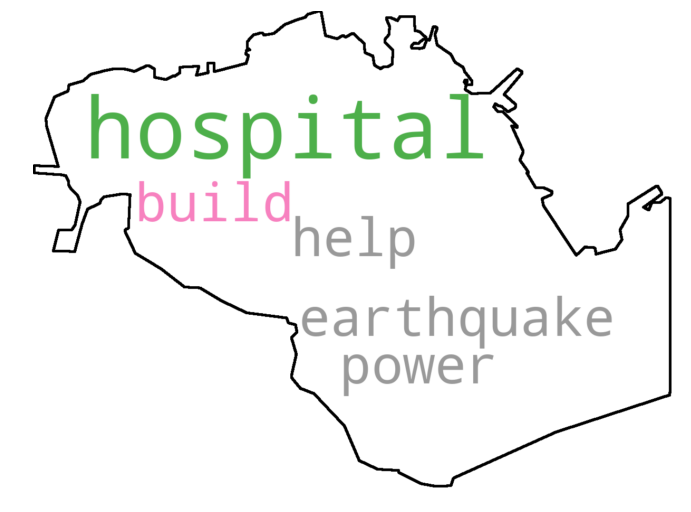

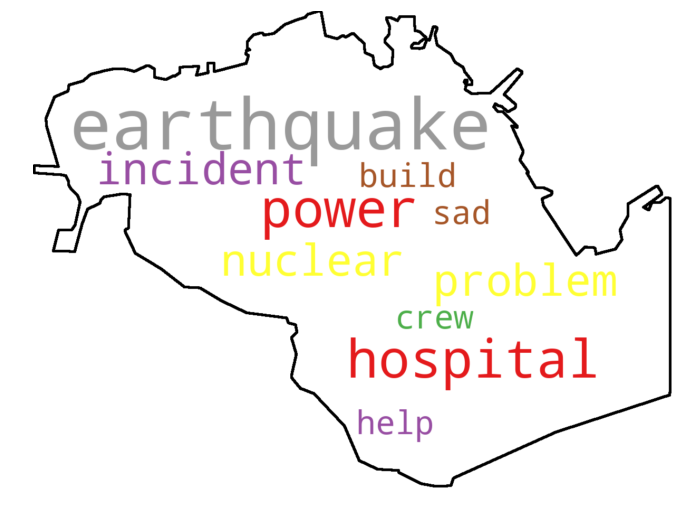

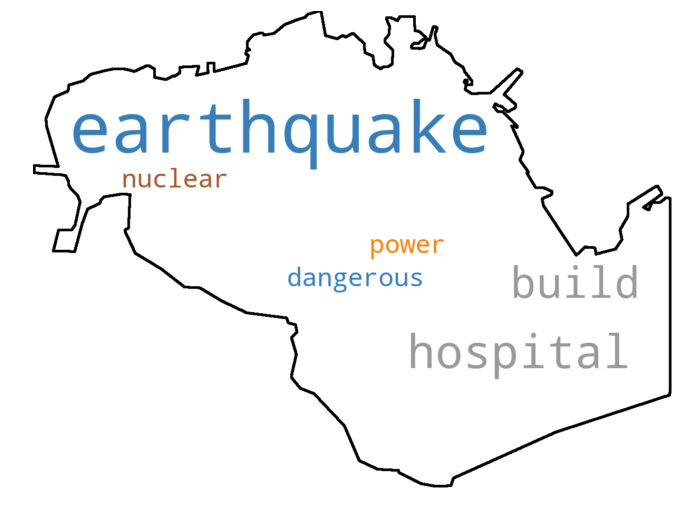

In [61]:
num = 2
ic = 0
for idx, cor in df_wcbairro.iterrows():
    gerar_wc(df_wcbairro,ivalo=cor.intervalo, idximg=str(num) ,bairro=cor.location)
    wcbairro.loc[ic] = [cor.intervalo, cor.location,"grafico1/static/images/bairro" + str(num) + ".png"]
    num += 1
    ic += 1

In [58]:
wcbairro

,intervalo,location,words
0,5,Palace Hills,grafico1/static/images/bairro2.png
1,5,Northwest,grafico1/static/images/bairro3.png
2,5,Old Town,grafico1/static/images/bairro4.png
3,5,Safe Town,grafico1/static/images/bairro5.png
4,5,Southwest,grafico1/static/images/bairro6.png
5,5,Downtown,grafico1/static/images/bairro7.png
6,5,Wilson Forest,grafico1/static/images/bairro8.png
7,5,Scenic Vista,grafico1/static/images/bairro9.png
8,5,Broadview,grafico1/static/images/bairro10.png
9,5,Chapparal,grafico1/static/images/bairro11.png
